In [7]:
?se

In [12]:
c = seq(1,3)
d = c(4,5,6)

r = c%*%d
r

32


In [19]:
r = matrix(1:15, nrow=3, ncol=5)
r

1,4,7,10,13
2,5,8,11,14
3,6,9,12,15


In [23]:
r[1:2,3:5]

7,10,13
8,11,14


In [25]:
dim(r)


[1] 3 5

In [27]:
eye(3)

ERROR: Error in eye(3): could not find function "eye"


# DataTypes


In [30]:
x <- TRUE
typeof(x)

[1] "logical"

In [32]:
a = 2.4
typeof(a)

[1] "double"

In [35]:
a = 2L
typeof(a)

[1] "integer"

In [37]:
a = "asdadfsv"
typeof(a)

[1] "character"

In [41]:
c = charToRaw("Hello")
print(c)
typeof(c)

[1] 48 65 6c 6c 6f


[1] "raw"

# Vector

In [53]:
app = c(1L, "as", "Asd", FALSE, c(1,24))
print(app)

[1] "1"     "as"    "Asd"   "FALSE" "1"     "24"   


##  type of the components in the hierarchy NULL < raw < logical < integer < double < complex < character < list < expression. 

In [60]:
# Create a list.
list1 <- list(c(2,5,3),21.3,sin)
list1[2]

[[1]]
[1] 21.3

In [64]:
df = data.frame(
   gender = c("Male", "Male","Female"), 
   height = c(152, 171.5, 165), 
   weight = c(81,93, 78),
   Age = c(42,38,26)
)
print(df)


  gender height weight Age
1   Male  152.0     81  42
2   Male  171.5     93  38
3 Female  165.0     78  26


# Example

In [85]:
len = 24
x = runif(len, min=0, max=1)
y <- x^3 + rnorm(len, 0, 0.06)
ds = data.frame(x=x, y=y)
ds

x,y
0.06509492,-0.018956047
0.24892435,0.033492091
0.99437008,0.981636427
0.38202420,-0.058861344
0.92783434,0.703445343
0.62235636,0.242125720
0.35568017,0.104397595
0.70501371,0.335720263
0.33922391,0.044535428
0.83630685,0.669437846


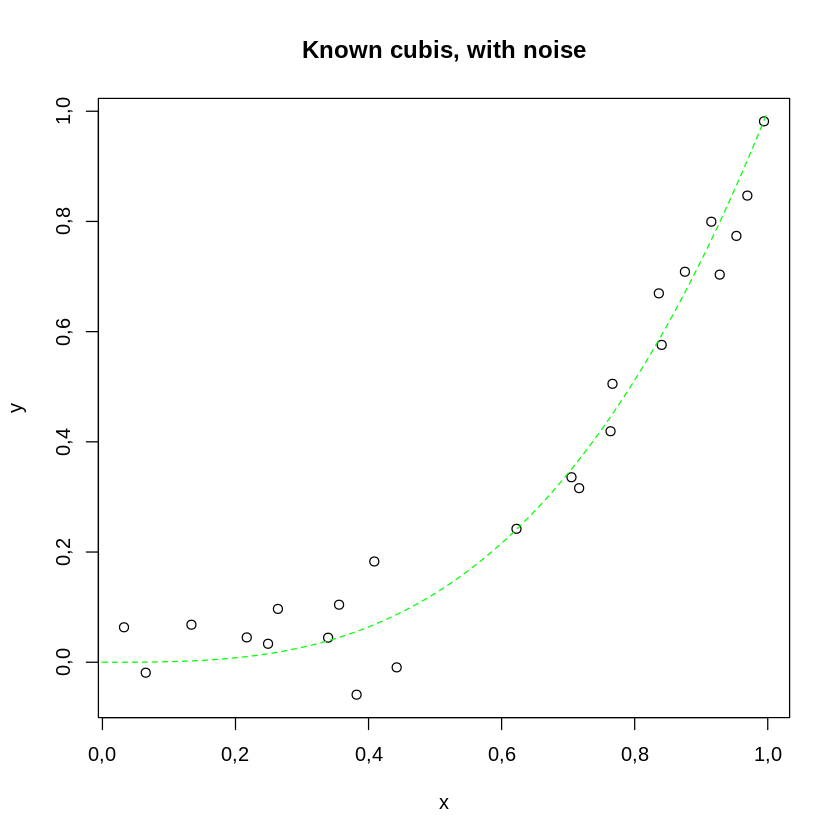

In [89]:
plot(y~x, main="Known cubis, with noise")
s = seq(0, 1, length=100)
lines(s, s^3, lty=2, col="green")

### we want to determine the most likely value for the exponent.
y_i = (x_i)^m + eps_i

eps ~ N(0, sigma^2)

In [93]:
m = nls(y ~ I(x^power), data=ds, start=list(power=1), trace=T)

1,580577 :  1
0,3371821 :  1,91438
0,1066605 :  2,716252
0,0935088 :  2,999758
0,09342697 :  3,024651
0,09342691 :  3,025346
0,09342691 :  3,025363


In [94]:
summary(m)

Warning message in printCoefmat(x$coefficients, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Formula: y ~ I(x^power)

Parameters:
      Estimate Std. Error t value Pr(>|t|)    
power    3,025      0,179    16,9 1,84e-14 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 0,06373 on 23 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 4,38e-07


In [95]:
summary(m)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
power,"3,025363","0,1790354","16,89812","1,838533e-14"


In [99]:
power <- round(summary(m)$coefficients[1],3)
power

[1] 3,025

In [101]:
power.se = round(summary(m)$coefficients[2], 3)
power.se

[1] 0,179

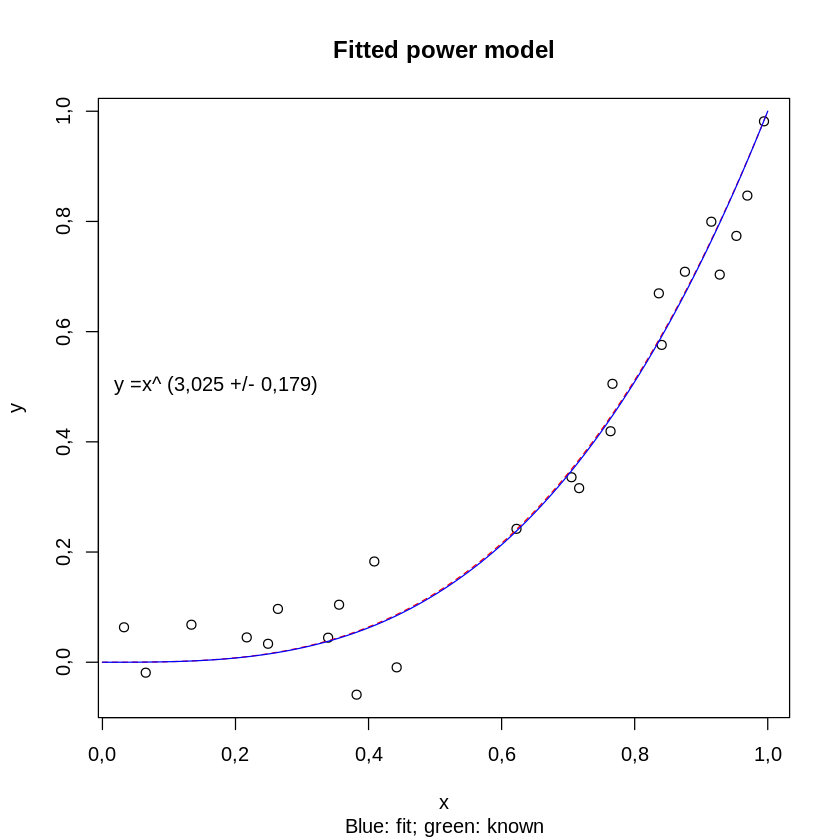

In [107]:
plot(y ~ x, main = "Fitted power model", sub = "Blue: fit; green: known")
s = seq(0, 1, length=100)
lines(s, s^3, lty=2, col="red")
lines(s, predict(m, list(x = s)), lty = 1, col = "blue")

text(0, 0.5, paste("y =x^ (", power, " +/- ", power.se, ")", sep=""), pos=4)

In [110]:
RSS.p <- sum(residuals(m)^2)
RSS.p

[1] 0,09342691